**Important Necessary Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch
import time
from matplotlib.pyplot import figure
from matplotlib.ticker import ScalarFormatter

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

import os.path

# the dataset directory
p = '/content/drive/MyDrive/NeCO/Final/'

Mounted at /content/drive


**Import the dataset**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/NeCO/Final/cardio_train.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Drop the ID Columns because its not useful for our analysis**

In [4]:
df=df.drop('id',axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Check the basic details of the dataset**
<br>
We can see that there are no null values and the data types are int64 and float64 for all the columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


**Saving the basic statistics of the dataset for report**

In [6]:
df.describe().T.to_csv("my_dataset_description.csv")

**Pair plot to view data distribution for each feature**

In [29]:
# sns.pairplot(df)

**Box Plot for checking presence of outliers**

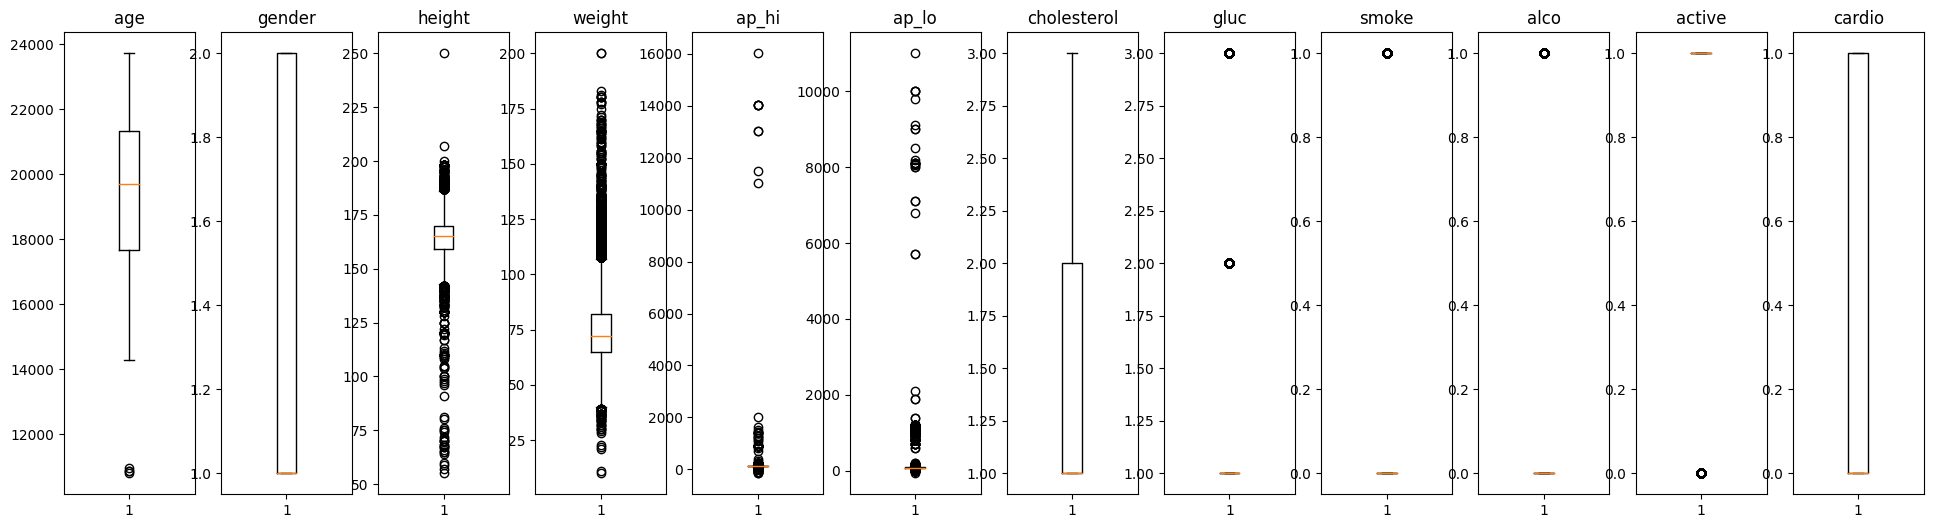

In [30]:
fig = plt.figure(figsize=(24,6))
count=1
for col in df.columns:
    ax = fig.add_subplot(1, len(df.columns), count)
    ax.boxplot(df[col])
    ax.set_title(col)
    count+=1
plt.show()

**Calculate Correlation of each column to find if we can drop any column before our analysis**
<br>
Since there is no very high correlation present in between training features, we will not drop any column for our analysis

<Axes: title={'center': 'Correlation Matrix'}>

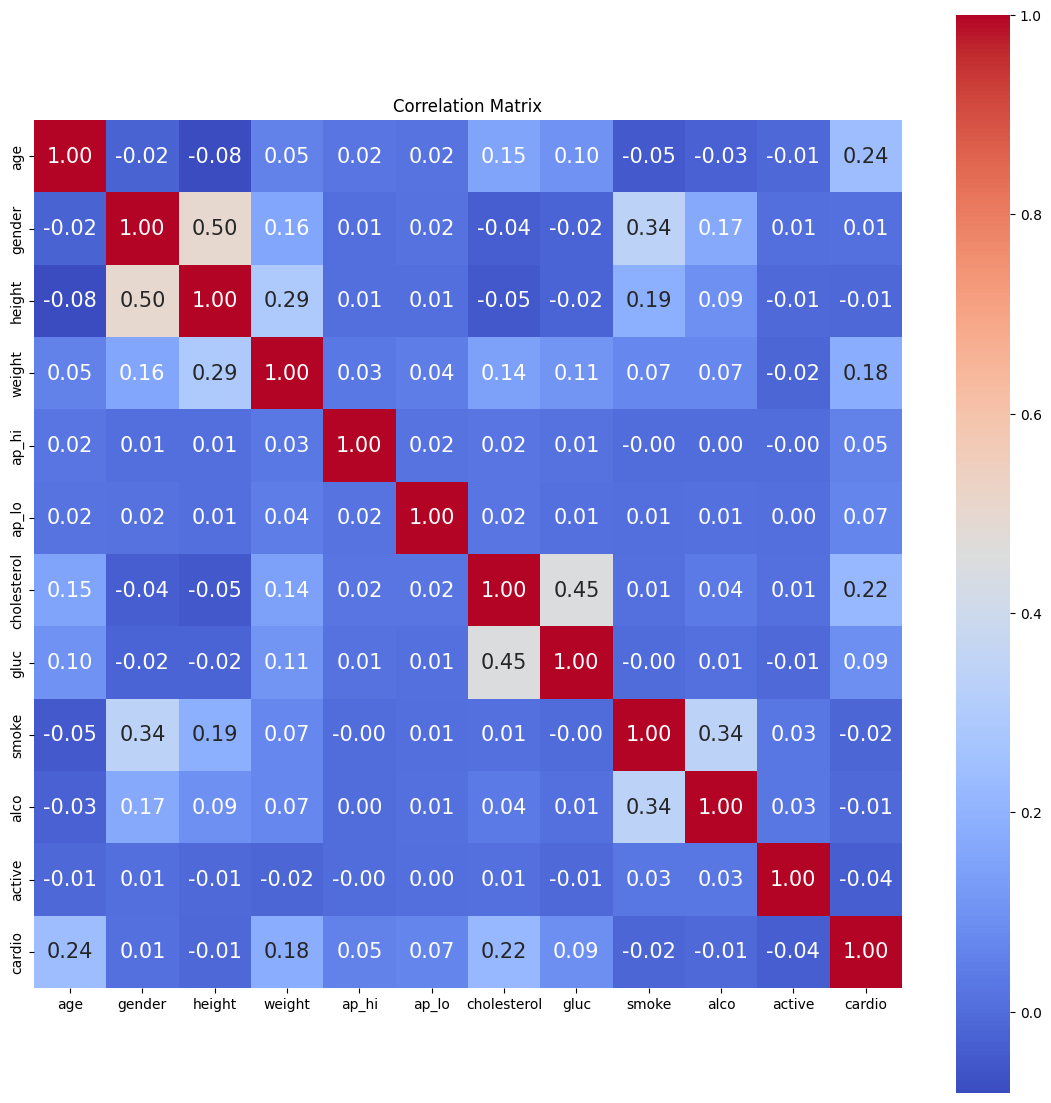

In [31]:
corr = df.corr()
plt.figure(figsize=(14,14))
plt.title('Correlation Matrix')
sns.heatmap(corr, cbar = True,  square = True, annot=True, 
            fmt= '.2f',annot_kws={'size': 15},xticklabels= df.columns, 
            yticklabels= df.columns,cmap= 'coolwarm')

In [4]:
import torch

In [7]:
torch.set_default_dtype(torch.float32)
X = df.drop("cardio", axis=1)
y = df["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train.values)
X_train = torch.DoubleTensor(X_train)
X_train = X_train.type(torch.FloatTensor)

X_test = torch.tensor(X_test.values)
X_test = torch.DoubleTensor(X_test)
X_test = X_test.type(torch.FloatTensor)

y_train = torch.tensor(y_train.values)
y_train = torch.LongTensor(y_train)
y_train = y_train.type(torch.FloatTensor)


y_test = torch.tensor(y_test.values)
y_test = torch.LongTensor(y_test)
y_test = y_test.type(torch.FloatTensor)

In [8]:
y_train.shape

torch.Size([56000])

# Code for Support Vector Machine (SVM)

In [9]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [10]:
# Create an instance of the SVM model
svm_model_instance = svm.SVC(kernel='linear')

# Fit the model on training data
svm_model_instance.fit(X_train, y_train)

# Evaluate the model on test data
y_pred = svm_model_instance.predict(X_test)
test_loss = mean_squared_error(y_test, y_pred)
print('Test loss:', test_loss)

Test loss: 0.27557144


In [11]:
# Import necessary libraries
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters
gamma = [0.01,0.1, 1]
C_list = [0.1, 1, 10]

# Create a SVM model instance
model = svm.SVC(max_iter=1000)

# Define a dictionary of hyperparameters
param_grid = {'C': C_list, 'kernel': ['rbf','poly'], 'gamma': gamma}

# Create a GridSearchCV instance with cross-validation and hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=True)

# Fit the GridSearchCV object on the training set to find the best hyperparameters
grid_search.fit(X_train[:10000], y_train[:10000])

# Print the best hyperparameters found by GridSearchCV
print(grid_search.best_params_)

# Get the cross-validation results
cv_results = grid_search.cv_results_

# Print the mean test score and corresponding parameters for all hyperparameter combinations
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print("Mean score: {:.4f} | Parameters: {}".format(mean_score, params))


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Mean score: 0.5217 | Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean score: 0.4064 | Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
Mean score: 0.5078 | Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean score: 0.5181 | Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Mean score: 0.6131 | Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Mean score: 0.5533 | Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Mean score: 0.5090 | Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean score: 0.4064 | Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'poly'}
Mean score: 0.5115 | Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean score: 0.5181 | Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
Mean score: 0.6135 | Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Mean score: 0.5533 | Parameters: {'C': 1, 'gamma': 1, 'kernel': 'poly'}
Mean score: 0.5025 | Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [12]:
# Importing the Support Vector Machine (SVM) classifier from the sklearn.svm module
from sklearn import svm

# Creating an instance of SVM with specified hyperparameters:
model = svm.SVC(max_iter=1000, C=0.1, gamma=1, kernel='rbf')

# Fitting the SVM model to the training data
model.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=0.1, gamma=1, max_iter=1000)

In [13]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from joblib import dump,load

In [15]:
dump(model,'sv_model.joblib')

['sv_model.joblib']

In [16]:
y_pred = model.predict(X_test)

Files for final run

In [17]:
# Importing necessary evaluation metrics from sklearn.metrics module
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

# Calculating accuracy score of model's predictions
accuracy = accuracy_score(y_test, y_pred)

# Printing the accuracy score as a string
print("Accuracy: " + str(accuracy))


Accuracy: 0.5677142857142857


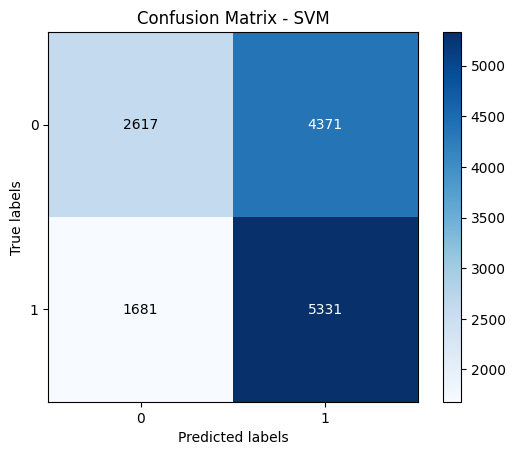

In [18]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['0','1']

#Plot Confusion Matrix Heat Map
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
cbar = ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted labels', ylabel='True labels')
threshold = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > threshold else "black")
plt.title('Confusion Matrix - SVM')
plt.show()

### **Code for MLP**

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
# Importing MLPClassifier from sklearn.neural_network module
from sklearn.neural_network import MLPClassifier

# Creating an instance of MLPClassifier and setting the random_state parameter to 42
mlp_class = MLPClassifier(random_state=42)

# Fitting the MLPClassifier instance to the training data
mlp_class.fit(X_train, y_train)


MLPClassifier(random_state=42)

In [21]:
y_pred = mlp_class.predict(X_test)

In [22]:
y_pred

array([1., 1., 1., ..., 0., 1., 0.], dtype=float32)

In [23]:
# Calculating accuracy score of model's predictions
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.6300714285714286

In [24]:
from sklearn.metrics import classification_report
print('TEST:', classification_report(y_test, y_pred))

TEST:               precision    recall  f1-score   support

         0.0       0.58      0.93      0.72      6988
         1.0       0.83      0.33      0.47      7012

    accuracy                           0.63     14000
   macro avg       0.71      0.63      0.59     14000
weighted avg       0.71      0.63      0.59     14000



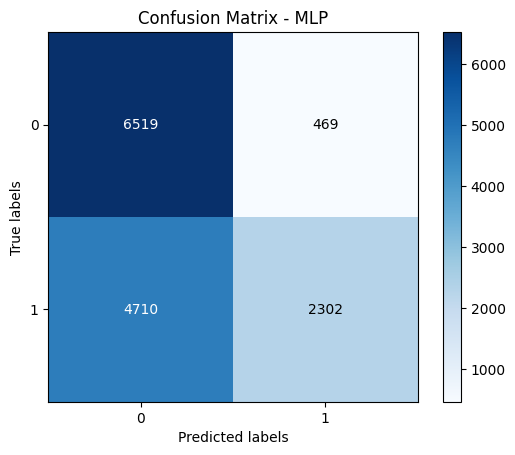

In [25]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['0','1']

#Plot Confusion Matrix Heat Map
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
cbar = ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted labels', ylabel='True labels')
threshold = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > threshold else "black")
plt.title('Confusion Matrix - MLP')
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': ['constant', 'adaptive'],
    'random_state': [42, 123],
    'activation': ['relu', 'tanh']
}

mlp_class = MLPClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp_class, param_grid, cv=5, verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print("Mean score: {:.4f} | Parameters: {}".format(mean_score, params))
# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mean score: 0.6339 | Parameters: {'activation': 'relu', 'learning_rate': 'constant', 'random_state': 42}
Mean score: 0.5771 | Parameters: {'activation': 'relu', 'learning_rate': 'constant', 'random_state': 123}
Mean score: 0.6339 | Parameters: {'activation': 'relu', 'learning_rate': 'adaptive', 'random_state': 42}
Mean score: 0.5771 | Parameters: {'activation': 'relu', 'learning_rate': 'adaptive', 'random_state': 123}
Mean score: 0.5000 | Parameters: {'activation': 'tanh', 'learning_rate': 'constant', 'random_state': 42}
Mean score: 0.4997 | Parameters: {'activation': 'tanh', 'learning_rate': 'constant', 'random_state': 123}
Mean score: 0.5000 | Parameters: {'activation': 'tanh', 'learning_rate': 'adaptive', 'random_state': 42}
Mean score: 0.4997 | Parameters: {'activation': 'tanh', 'learning_rate': 'adaptive', 'random_state': 123}
Best parameters:  {'activation': 'relu', 'learning_rate': 'constant', 'random_state': 42}
Best s

For final run

Accuracy 0.6300714285714286
TEST:               precision    recall  f1-score   support

         0.0       0.58      0.93      0.72      6988
         1.0       0.83      0.33      0.47      7012

    accuracy                           0.63     14000
   macro avg       0.71      0.63      0.59     14000
weighted avg       0.71      0.63      0.59     14000



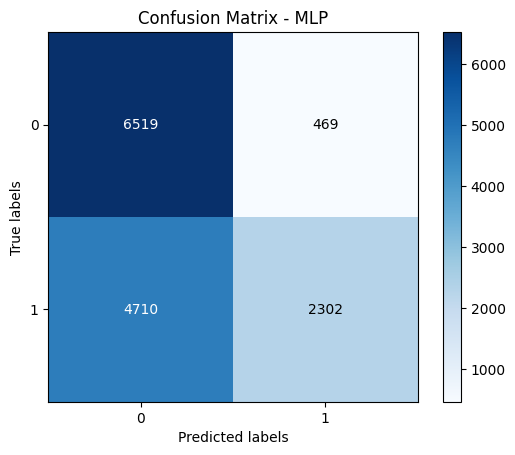

In [27]:
mlp_class = MLPClassifier(random_state=42,activation='relu',learning_rate='constant')
mlp_class.fit(X_train, y_train)
y_pred = mlp_class.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print('Accuracy',accuracy_test)
print('TEST:', classification_report(y_test, y_pred))


#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['0','1']

#Plot Confusion Matrix Heat Map
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
cbar = ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted labels', ylabel='True labels')
threshold = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > threshold else "black")
plt.title('Confusion Matrix - MLP')
plt.show()

In [1]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [1]:
# Perform 5-fold cross-validation and compute mean accuracy
cv_scores = cross_val_score(mlp_class, X_train, y_train, cv=5)
print("CV scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Fit the model on the entire training set
mlp_class.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = mlp_class.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print('Accuracy',accuracy_test)
print('TEST:', classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['0', '1']

# Plot Confusion Matrix Heat Map
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
cbar = ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted labels', ylabel='True labels')
threshold = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > threshold else "black")
plt.title('Confusion Matrix - MLP')
plt.show()